In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [531]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/mushrooms.csv')

In [532]:
df.shape

(8124, 23)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [534]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [535]:
df.duplicated().sum()

0

In [536]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [537]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [538]:
X = df.drop(columns='class',axis=1)
y = df['class']

In [539]:
from sklearn.preprocessing import LabelEncoder

label_info = LabelEncoder()

y = label_info.fit_transform(y)

In [540]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [541]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


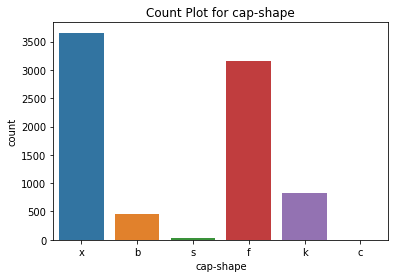

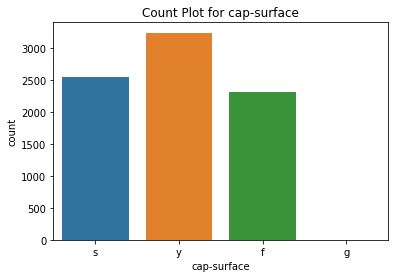

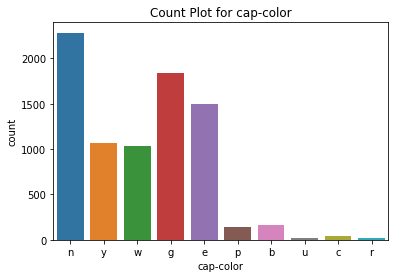

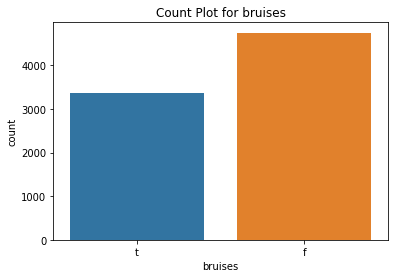

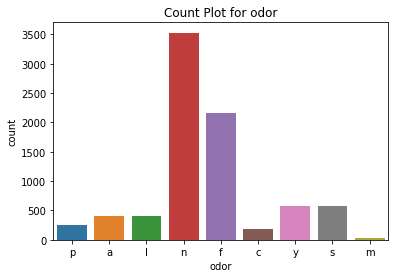

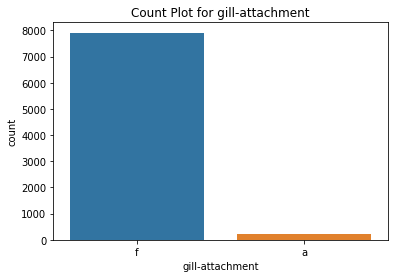

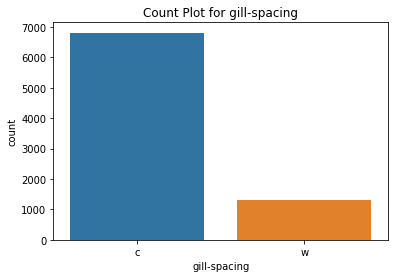

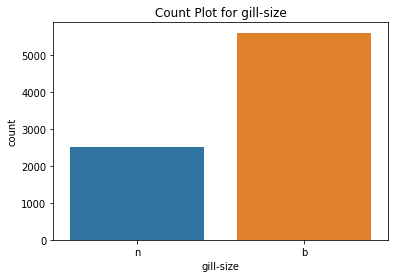

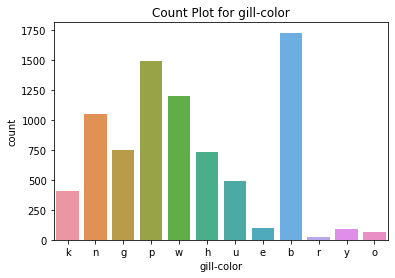

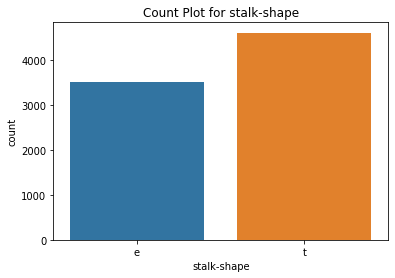

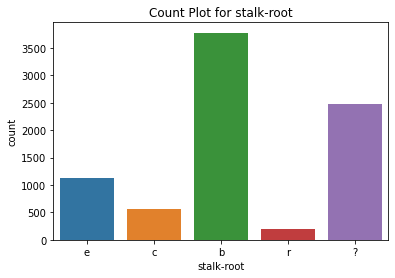

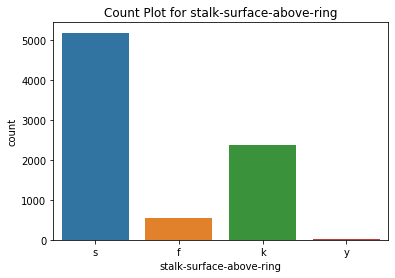

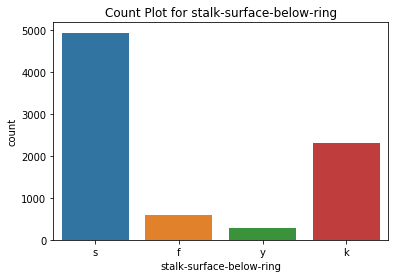

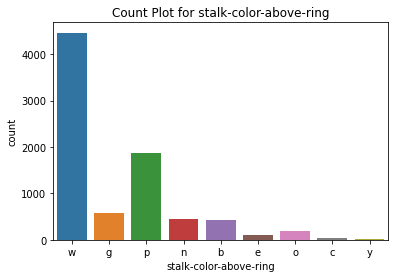

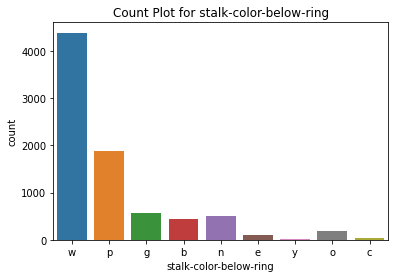

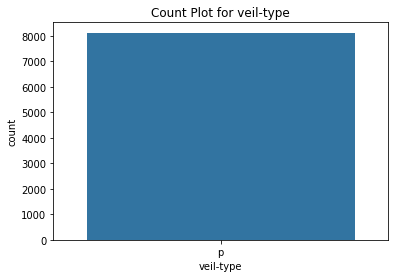

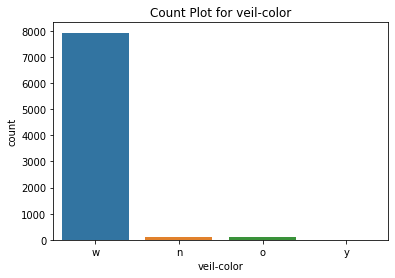

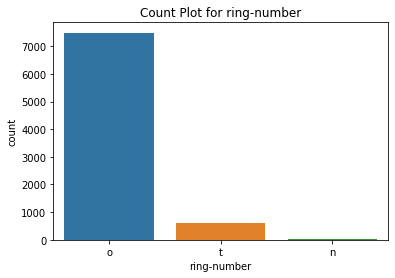

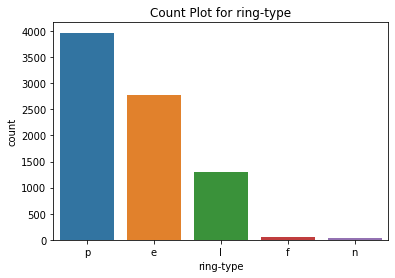

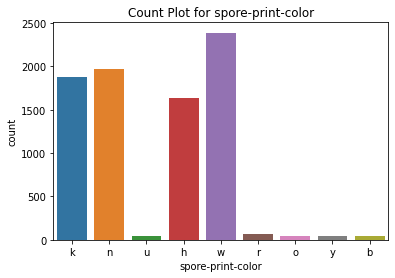

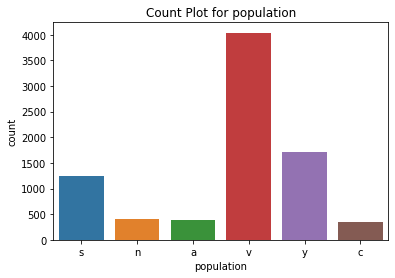

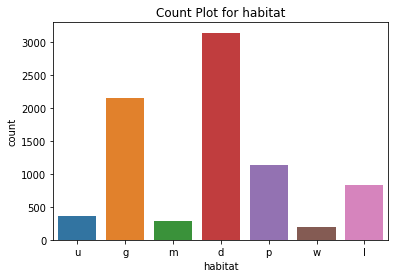

--------------------------------------------------


<AxesSubplot:xlabel='class', ylabel='count'>

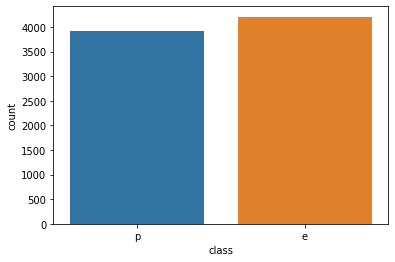

In [542]:
for col in X:
    sns.countplot(data=X,x=col)
    plt.title(f"Count Plot for {col}")
    plt.show()

print('-'*50)

sns.countplot(data=df,x='class')

## Feature Selection

In [543]:
X.shape

(8124, 22)

In [544]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [545]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,k,s,e,f,s,f,c,n,b,t,...,k,p,w,p,w,o,e,w,v,d
6515,x,s,n,f,f,f,c,n,b,t,...,s,w,w,p,w,o,e,w,v,p
6141,f,y,e,f,y,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,l
2764,f,f,n,t,n,f,c,b,u,t,...,s,g,p,p,w,o,p,n,v,d
438,b,y,y,t,l,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,m


In [546]:
# For Categorical coloumns we use chi2 contingency

from scipy.stats import chi2_contingency

significant_columns = {}

for col in X_train:
    cotengency_table = pd.crosstab(df['class'],df[col])

    # run chi-square test on the table
    chi2_stat,p_val,dof, expected = chi2_contingency(cotengency_table)

    print(f"{col} chi-test={chi2_stat:.3f},p-val={p_val:.3f}")

    if p_val < 0.05:
        significant_columns[col] = p_val

    

print(len(significant_columns))
significant_columns.keys()


cap-shape chi-test=489.920,p-val=0.000
cap-surface chi-test=315.043,p-val=0.000
cap-color chi-test=387.598,p-val=0.000
bruises chi-test=2041.416,p-val=0.000
odor chi-test=7659.727,p-val=0.000
gill-attachment chi-test=133.986,p-val=0.000
gill-spacing chi-test=984.143,p-val=0.000
gill-size chi-test=2366.834,p-val=0.000
gill-color chi-test=3765.714,p-val=0.000
stalk-shape chi-test=84.142,p-val=0.000
stalk-root chi-test=1344.441,p-val=0.000
stalk-surface-above-ring chi-test=2808.286,p-val=0.000
stalk-surface-below-ring chi-test=2684.474,p-val=0.000
stalk-color-above-ring chi-test=2237.898,p-val=0.000
stalk-color-below-ring chi-test=2152.391,p-val=0.000
veil-type chi-test=0.000,p-val=1.000
veil-color chi-test=191.224,p-val=0.000
ring-number chi-test=374.737,p-val=0.000
ring-type chi-test=2956.619,p-val=0.000
spore-print-color chi-test=4602.033,p-val=0.000
population chi-test=1929.741,p-val=0.000
habitat chi-test=1573.777,p-val=0.000
21


dict_keys(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

In [547]:
updated_X_train = ['cap-shape', 'cap-surface', 'cap-color', 'bruises','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

X_train = X_train[updated_X_train]
X_test = X_test[updated_X_train]

In [548]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,k,s,e,f,f,c,n,b,t,?,s,k,p,w,w,o,e,w,v,d
6515,x,s,n,f,f,c,n,b,t,?,k,s,w,w,w,o,e,w,v,p
6141,f,y,e,f,f,c,n,b,t,?,s,s,p,w,w,o,e,w,v,l
2764,f,f,n,t,f,c,b,u,t,b,s,s,g,p,w,o,p,n,v,d
438,b,y,y,t,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,m


In [549]:
cat_imput = Pipeline([
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first',sparse=False))
])


col_transform = ColumnTransformer([
    ('pre_process',cat_imput,X_train.columns)
])

In [550]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


algorithms = {
    "random_forest": RandomForestClassifier(),
    "gb": GradientBoostingClassifier(),
    "adb": AdaBoostClassifier(),
    "lr": LogisticRegression(),
    "svm": SVC(),
    "dt": DecisionTreeClassifier(),
    "xgb": xgb.XGBClassifier(use_label_encoder=False,eval_metric='error')
}

results = {}
pipeline_results = {}

for name,algo in algorithms.items():
    pipeline = Pipeline([
        ('pipeline',col_transform),
        ('algo',algo)
    ])

    joblib.dump(pipeline,f"{name}.pkl")

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    clf_report = classification_report(y_test,y_pred)
    cf_matrix = confusion_matrix(y_test,y_pred)
    cv_score = cross_val_score(pipeline,X_train,y_train,cv=5,scoring='accuracy')
    cv_mean  = cv_score.mean()


    print(f"{name}")
    print(f"Accuracy:{accuracy}")
    print(f"clf report:\n{clf_report}")
    print(f"cf_matrix:\n{cf_matrix}")
    print(f"cv score:{cv_score}")
    print(f"cv mean:{cv_mean}")
    print('-'*50)

random_forest
Accuracy:1.0
clf report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cf_matrix:
[[843   0]
 [  0 782]]
cv score:[1. 1. 1. 1. 1.]
cv mean:1.0
--------------------------------------------------
gb
Accuracy:0.9944615384615385
clf report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cf_matrix:
[[834   9]
 [  0 782]]
cv score:[1.         1.         0.99538462 0.99461538 1.        ]
cv mean:0.998
---------------------------